In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run ../src/acc_clusters
%run ../src/acc_df

In [2]:
Acd = Acc_data('../data/cleaned/coll_coord.csv')

/Users/franzmornau/g92dsi/capstone/Traffic-Accident-Hotspots-and-Patterns/src/acc_df.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['ds']=X.ds.apply(lambda x: pd.to_datetime(x))


In [3]:
mvc = Acd.get_pure_mv_coll()
cvc=Acd.get_cyclist_coll()
pvc = Acd.get_pedestrian_coll()

## Let's look into *Points* 
Meaning: hot spots that we can get simply by aggregation by geographical identification (= accidents that have they have the same coordinates)

In [4]:
n=100
M = mvc.groupby(['latitude','longitude']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)
C = cvc.groupby(['latitude','longitude']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)
P = pvc.groupby(['latitude','longitude']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)

In [6]:
ym =[M.index.values[i][0] for i in range(len(M))]
xm =[M.index.values[i][1] for i in range(len(M))]

In [7]:
yc =[C.index.values[i][0] for i in range(len(C))]
xc =[C.index.values[i][1] for i in range(len(C))]

In [8]:
yp =[P.index.values[i][0] for i in range(len(C))]
xp =[P.index.values[i][1] for i in range(len(C))]

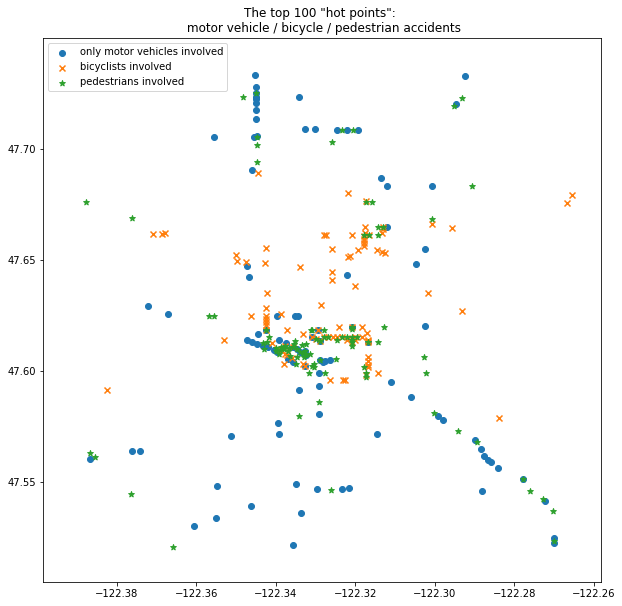

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xm,ym,marker='o', label='only motor vehicles involved')
ax.scatter(xc,yc,marker='x', label='bicyclists involved')
ax.scatter(xp,yp,marker='*', label='pedestrians involved')
ax.legend()

plt.title('The top {} "hot points": \n motor vehicle / bicycle / pedestrian accidents'.format(n))

plt.savefig('../imagesjnbs_part1/comparison_mv_ped_cycl')

In [11]:
print(M.OBJECTID.max(), M.OBJECTID.min())
print(C.OBJECTID.max(), C.OBJECTID.min())
print(P.OBJECTID.max(), P.OBJECTID.min())

269 79
23 5
28 9


Text(0.5, 1.0, 'the top 100 "hot points": distribution')

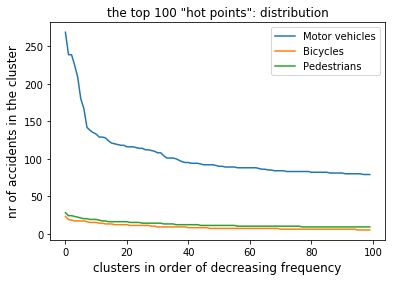

In [19]:
fig, ax = plt.subplots()
ax.plot(range(100),M.OBJECTID.values, label='Motor vehicles')
ax.plot(range(100),C.OBJECTID.values,label='Bicycles')
ax.plot(range(100),P.OBJECTID.values, label='Pedestrians')
ax.set_xlabel('clusters in order of decreasing frequency', fontsize=12)
ax.set_ylabel('nr of accidents in the cluster', fontsize=12)
ax.legend()
plt.title('the top 100 "hot points": distribution')

Futher work: look into variations over time